# Simulation 1: amplitudes, number of events and tolerance levels

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import  hmp
import bambi as bmb 
import pandas as pd
import arviz as az
from os import listdir
import mne
from hmp import simulations
from scipy.stats import gamma
from itertools import product

colors = iter([plt.cm.tab10(i) for i in range(10)])

def fit_or_load(filename, path, model):
    if filename not in listdir(path):
        fit = model.fit(inference_method='nuts_numpyro')
        fit.to_netcdf(path+'/'+filename)
    else:
        fit = az.from_netcdf(path+'/'+filename)
    return fit


Simulating ./simulated/1e-06_1trial_raw.fif
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_noiseless_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_noiseless_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_raw.fif
[done]
./simulated/1e-06_1trial_raw.fif simulated
Reading 0 ... 26127  =      0.000 ...    52.254 secs...
EEG channel type selected for re-referencing
A

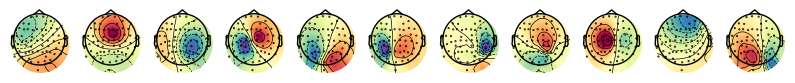

In [2]:
def epoching(data, events, event_id):
    data.load_data()
    data.set_eeg_reference('average')
    epochs = mne.Epochs(data, events = events, event_id=event_id, 
                        tmin = -0.25, tmax=3)
    return epochs

source_index = simulations.available_sources()[[34,47,21,44, 42, 14,17, 59, 49,  25, 23, 11]]
fig, ax = plt.subplots(1,len(source_index)-1,figsize=(10,1),dpi=100)

amplitude = 1e-6
n_trials = 1
shape = 2 #shape of the gamma distribution
means = np.repeat(200, len(source_index))/shape #Mean duration of the stages in ms
frequency = 10
sfreq = 500
sources = []
for source in zip(source_index, means): #One source = one frequency, one amplitude and a given by-trial variability distribution
    sources.append([source[0], frequency, amplitude, gamma(shape, scale=source[1])])

file = simulations.simulate(sources, n_trials, 5, 'simulated/%s_1trial'%amplitude, 
                            sfreq=sfreq, overwrite=False, noise=True, save_snr=True, seed=1,save_noiseless=True)
events = np.load(file[1])
event_id = {'stimulus':1}#trigger 1 = stimulus
# #Visualising the raw simulated EEG data
raw_noiseless = mne.io.read_raw_fif(file[-1], preload=False, verbose=False)
epochs_noiseless = epoching(raw_noiseless, events, event_id)
epochs_noiseless.load_data()
raw = mne.io.read_raw_fif(file[0], preload=False, verbose=False)
events = np.load(file[1])
event_id = {'stimulus':1}#trigger 1 = stimulus
# #Visualising the raw simulated EEG data
raw = mne.io.read_raw_fif(file[0], preload=False, verbose=False)
snr = np.load(file[2])
for event in range(snr.shape[2]):
    mne.viz.plot_topomap(np.mean(snr[0,:,event,:], axis=-1), pos=raw.info, vlim=(-1e-5,1e-5), axes=ax[event], show=False, cmap='Spectral_r')
plt.savefig('../../plots/%s_patterns.png'%amplitude,dpi=300,transparent=True,bbox_inches='tight')

Simulating ./simulated/1e-08_1trial_raw.fif
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-08_1trial_noiseless_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-08_1trial_noiseless_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-08_1trial_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-08_1trial_raw.fif
[done]
./simulated/1e-08_1trial_raw.fif simulated
Reading 0 ... 13538  =      0.000 ...    27.076 secs...
EEG channel type selected for re-referencing
A

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/mne/epochs.py:2986: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metadata.iloc[:, 0] = ""
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:657: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for i,trial_dat in data.stack(trial=("participant", "epochs")).drop_duplicates('trial').groupby('trial'):
/home/gweindel/miniconda3/envs/hmp2/lib/python3

Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-07_1trial_noiseless_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-07_1trial_noiseless_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-07_1trial_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-07_1trial_raw.fif
[done]
./simulated/1e-07_1trial_raw.fif simulated
Reading 0 ... 13511  =      0.000 ...    27.022 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/mne/epochs.py:2986: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metadata.iloc[:, 0] = ""
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:657: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for i,trial_dat in data.stack(trial=("participant", "epochs")).drop_duplicates('trial').groupby('trial'):
/home/gweindel/miniconda3/envs/hmp2/lib/python3

Simulating ./simulated/1e-06_1trial_raw.fif
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_noiseless_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_noiseless_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_1trial_raw.fif
[done]
./simulated/1e-06_1trial_raw.fif simulated
Reading 0 ... 15943  =      0.000 ...    31.886 secs...
EEG channel type selected for re-referencing
A

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/mne/epochs.py:2986: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metadata.iloc[:, 0] = ""
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:657: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for i,trial_dat in data.stack(trial=("participant", "epochs")).drop_duplicates('trial').groupby('trial'):
/home/gweindel/miniconda3/envs/hmp2/lib/python3

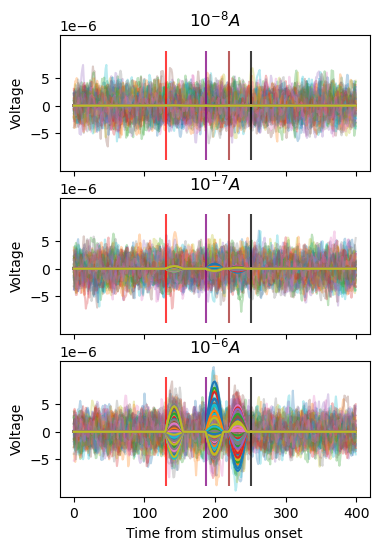

In [3]:

fig, ax = plt.subplots(3,1, figsize=(4,6), dpi=100, sharex=True, sharey=True)

Nevents = 4
means = np.array([100,100,100,100])/shape #Mean duration of the stages in ms
names = source_index[:4] #Which source to activate at each stage (see atlas when calling simulations.available_sources())
logs = [-8,-7,-6]
i = 0
for amplitude in [1e-8, 1e-7, 1e-6]:

    sources = []
    for source in zip(names, means): #One source = one frequency, one amplitude and a given by-trial variability distribution
        sources.append([source[0], frequency, amplitude, gamma(shape, scale=source[1])])

    file = simulations.simulate(sources, n_trials, 5, 'simulated/%s_1trial'%amplitude, 
                                sfreq=sfreq, overwrite=False, noise=True, save_snr=True, seed=3,save_noiseless=True)
    events = np.load(file[1])
    event_id = {'stimulus':1}#trigger 1 = stimulus
    # #Visualising the raw simulated EEG data
    raw_noiseless = mne.io.read_raw_fif(file[-1], preload=False, verbose=False)
    epochs_noiseless = epoching(raw_noiseless, events, event_id)
    epochs_noiseless.load_data()
    raw = mne.io.read_raw_fif(file[0], preload=False, verbose=False)
    snr = np.load(file[2])
    epochs = epoching(raw, events, event_id)
    epochs.load_data()
    
    ax[i].plot(epochs_noiseless.average().pick_types(eeg=True).get_data().T[125:525], zorder=10)
    ax[i].plot(epochs.average().pick_types(eeg=True).get_data().T[125:525], alpha=.3)
    ax[i].set_title(r'$10^{%s}A$'%logs[i])
    ax[i].set_ylabel('Voltage')
    ax[i].set_yticks([-5e-6,0,5e-6])
    
    # Feeding data and initialize HMP
    #Recover info from simulation
    generating_events = np.load(file[1])
    resp_trigger = int(np.max(np.unique(generating_events[:,2])))#Resp trigger is the last source in each trial
    event_id = {'stimulus':1}#trigger 1 = stimulus
    resp_id = {'response':resp_trigger}#Response is defined as the last trigger in a sequence of events
    #Keeping only stimulus and response triggers
    events = generating_events[(generating_events[:,2] == 1) | (generating_events[:,2] == resp_trigger)]#only retain stimulus and response triggers

    epoch_data = hmp.utils.read_mne_data(file[0], event_id=event_id, resp_id=resp_id, 
                           sfreq=sfreq, events_provided=events, verbose=False)
    hmp_data = hmp.utils.transform_data(epoch_data, apply_standard=False, n_comp=5)
    init = hmp.models.hmp(hmp_data, sfreq=sfreq)#Initialization of the model
    random_source_times, _, _, _ = simulations.simulated_times_and_parameters(generating_events, init)
    random_source_times_cs = random_source_times.cumsum(axis=1)
    ev_colors = iter(['red', 'purple','brown','black'])
    for event in range(Nevents):
        ev_c = next(ev_colors)
        ax[i].vlines(random_source_times_cs[0,event], ymin=1e-5, ymax=-1e-5, color=ev_c, alpha=.75) 

    i += 1
ax[2].set_xlabel('Time from stimulus onset')

plt.savefig('../../plots/ERPs_all-elec.png',dpi=300,transparent=True,bbox_inches='tight')

## Collecting and concatenating results from cluster

In [4]:
results = []
i = 0 
path = 'simulation_data/amp-tol-nev/'
for file in listdir(path):
    if 'results' in file:
        r_i = xr.load_dataset(path+file, engine='netcdf4')
        r_i['seed'] = r_i.seed
        results.append(r_i)
        i += 1
results = xr.concat(results, dim='iteration')
results = results.rename({'n_events':'Nevents','true_n_events':'TrueN','test_n_events':'TestN'})
results['Hit'] = results.hit.count('event')
results['PPV'] = (results['Hit']) / results.TestN
results['TPR'] = (results['Hit']) / results.TrueN
print(f'{len(results.where(np.isnan(results.TPR), drop=True).iteration)} simulations are Nan')
results = results.dropna(dim="iteration", how="any", subset=['TPR'])
results

4 simulations are Nan


<xarray.Dataset>
Dimensions:           (iteration: 496, all_combination: 16, stage: 11,
                       event: 10, trial: 100, component: 5)
Coordinates:
    Nevents           (all_combination) float64 1.0 1.0 1.0 ... 10.0 10.0 10.0
    tolerances        (all_combination) float64 0.01 0.001 ... 0.0001 1e-05
Dimensions without coordinates: iteration, all_combination, stage, event,
                                trial, component
Data variables: (12/16)
    means             (iteration, all_combination, stage) float64 nan ... nan
    amplitude         (iteration, all_combination) float64 3.464e-07 ... 8.11...
    TrueN             (iteration, all_combination) float64 1.0 1.0 ... 10.0 10.0
    TestN             (iteration, all_combination) float64 1.0 1.0 ... 5.0 5.0
    loglikelihood     (iteration, all_combination) float64 -86.55 ... 763.3
    time              (iteration, all_combination) float64 1.036 2.97 ... 71.0
    ...                ...
    gen_mags          (iteration, all_combination, event, component) float64 ...
    recov_mags        (iteration, all_combination, event, component) float64 ...
    seed              (iteration) int64 151 189 143 53 333 ... 14 118 105 311
    Hit               (iteration, all_combination) int64 1 1 1 1 3 ... 4 5 5 5 5
    PPV               (iteration, all_combination) float64 1.0 1.0 ... 1.0 1.0
    TPR               (iteration, all_combination) float64 1.0 1.0 ... 0.5 0.5
Attributes:
    distribution:  gamma
    shape:         2
    sfreq:         100
    n_comp:        5
    event_width:   50
    n_trials:      100
    seed:          151

## Modelling TPR and PPV

In [5]:
Nevents_df = results.groupby('all_combination').mean(('trial','component','stage','event')).to_dataframe().reset_index()
Nevents_df['Ampere'] = np.log10(Nevents_df.amplitude)
Nevents_df['Ampere'] = Nevents_df['Ampere'] - Nevents_df['Ampere'].mean()
#For easiness of fit and interpretability we convert tolerance to unit: 1e-02 = 1, 1e-03 = 2,...
Nevents_df['Tolerance'] = Nevents_df['tolerances'].replace(Nevents_df['tolerances'].unique(), np.arange(len(Nevents_df['tolerances'].unique()))-len(Nevents_df['tolerances'].unique()))
Nevents_df['Nevents'] -= 3 #Intercept is 3 events for convenience also with other simulation sections

rec_model = bmb.Model("p(Hit, TrueN) ~ Ampere * Tolerance * Nevents", Nevents_df, family="binomial")
ppv_model = bmb.Model("p(Hit, TestN) ~ Ampere * Tolerance * Nevents", Nevents_df, family="binomial")

In [6]:
rec_fit = fit_or_load('rec_model_amp-to-nev.nc', 'bambi_fits/',rec_model)
ppv_fit = fit_or_load('ppv_model_amp-to-nev.nc', 'bambi_fits/', ppv_model)

## Generating predictions for plotting

In [7]:
def len_prod(a,b):
    return len(list(product(a, b)))

Ampere = np.linspace(Nevents_df.Ampere.min(), Nevents_df.Ampere.max(),  num=100)
Tolerance = Nevents_df.Tolerance.unique()
Nevents = Nevents_df.Nevents.unique()

new_data = pd.DataFrame({
    "Ampere": np.tile(Ampere, len_prod(Tolerance, Nevents)),
    "Tolerance": np.repeat(Tolerance, len_prod(Ampere, Nevents)),
    "Nevents": np.tile(np.repeat(Nevents,len(Ampere)),(1,len(Tolerance)))[0]
})

In [8]:
rec_model.predict(rec_fit, data=new_data)
rec_posterior = az.extract(rec_fit, num_samples=2000)['p(Hit, TrueN)_mean']

ppv_model.predict(ppv_fit, data=new_data)
ppv_posterior = az.extract(ppv_fit, num_samples=2000)['p(Hit, TestN)_mean']

## Inspecting summary

In [9]:
az.summary(rec_fit, hdi_prob=.95, var_names=list(list(rec_fit.posterior.data_vars.keys()))[:-1])

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.232,0.076,1.085,1.381,0.002,0.002,1277.0,2007.0,1.0
Ampere,5.626,0.207,5.220,6.020,0.006,0.004,1116.0,1680.0,1.0
Tolerance,0.193,0.027,0.140,0.246,0.001,0.001,1277.0,1788.0,1.0
Ampere:Tolerance,0.075,0.075,-0.071,0.226,0.002,0.002,1117.0,1687.0,1.0
Nevents,-0.179,0.013,-0.206,-0.153,0.000,0.000,1296.0,1860.0,1.0
Ampere:Nevents,-0.322,0.037,-0.392,-0.250,0.001,0.001,1185.0,1828.0,1.0
Tolerance:Nevents,-0.041,0.005,-0.051,-0.032,0.000,0.000,1305.0,1987.0,1.0
Ampere:Tolerance:Nevents,-0.105,0.014,-0.132,-0.078,0.000,0.000,1247.0,1834.0,1.0


In [10]:
az.summary(ppv_fit, hdi_prob=.95, var_names=list(list(rec_fit.posterior.data_vars.keys()))[:-1])

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,4.219,0.203,3.840,4.629,0.006,0.005,994.0,1472.0,1.01
Ampere,7.423,0.551,6.335,8.469,0.021,0.015,681.0,1051.0,1.01
Tolerance,0.489,0.063,0.367,0.609,0.002,0.001,1365.0,1844.0,1.01
Ampere:Tolerance,1.537,0.155,1.239,1.841,0.006,0.004,746.0,1383.0,1.00
Nevents,1.554,0.099,1.368,1.754,0.004,0.003,628.0,959.0,1.01
Ampere:Nevents,3.734,0.250,3.235,4.205,0.010,0.007,695.0,1007.0,1.01
Tolerance:Nevents,0.353,0.026,0.301,0.404,0.001,0.001,657.0,919.0,1.01
Ampere:Tolerance:Nevents,0.996,0.064,0.872,1.121,0.002,0.002,747.0,1209.0,1.01


## Plotting predictions

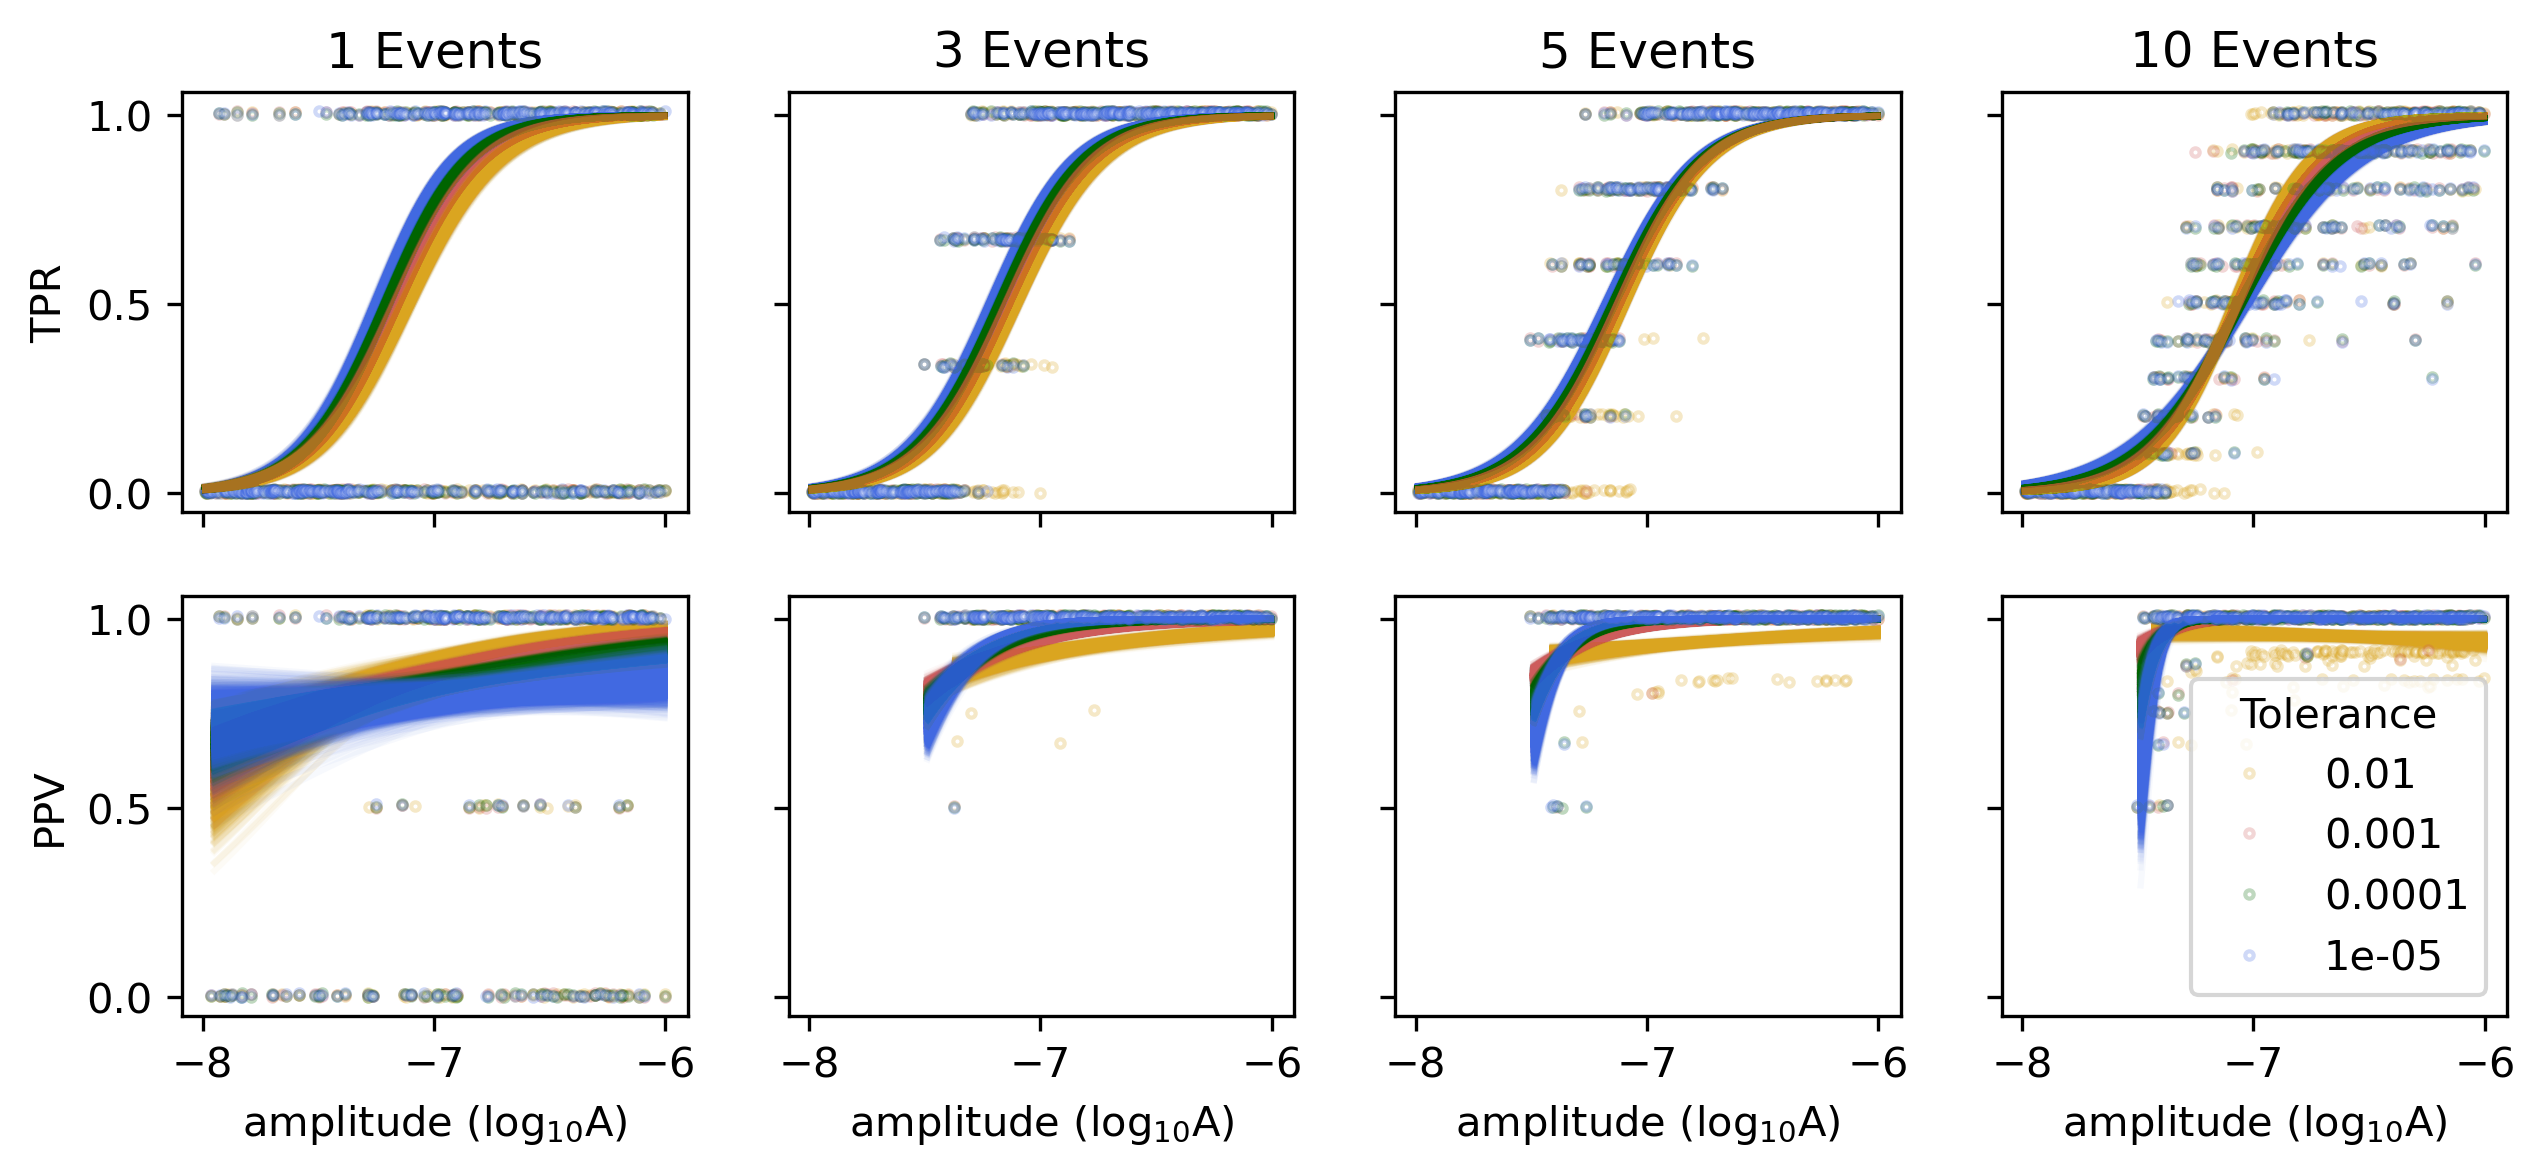

In [11]:
fig, ax = plt.subplots(2,4, dpi=300, figsize=(10,4), sharey=True, sharex=True)

mean_to_add = np.log10(results.groupby('all_combination').mean(('trial','component','stage','event')).to_dataframe().reset_index()['amplitude']).mean()
for i, n_ev in enumerate(Nevents):
    colors = iter(['royalblue','darkgreen','indianred','goldenrod'][::-1])
    for j, tol in enumerate(Nevents_df['tolerances'].unique()):
        c = next(colors)
        idx = new_data.index[(new_data["Nevents"] == n_ev)
                & (new_data["Tolerance"] == Tolerance[j])].tolist()
        ax[0,i].plot(Ampere+mean_to_add, rec_posterior[idx], alpha=0.02, color=c, zorder=10-j)

        subset = Nevents_df[(Nevents_df.tolerances == tol) & 
                            (Nevents_df.Nevents == n_ev)].sort_values(by='amplitude')
        x = subset.Ampere.copy()
        y = subset.TPR
        ax[0,i].plot(x+mean_to_add, y+np.random.uniform(0, 1e-2, len(x)), '.', color=c, alpha=.25, mfc='w', ms=4)
        ax[0,i].set_title(f'{int(n_ev)+3} Events')
        y = subset.PPV
        nans_idx = np.where(np.isnan(y))[0]#all nans in PPV
        min_val = x.iloc[nans_idx[np.where(np.diff(nans_idx) > 1)[0][0]]]#First non-nan among nans
        idx = new_data.index[(new_data["Nevents"] == n_ev)
                & (new_data["Tolerance"] == Tolerance[j])
                & (new_data["Ampere"] > min_val)].tolist()
        x.iloc[nans_idx[np.where(np.diff(nans_idx) > 1)[0][0]]]#First non-nan among nans
        ax[1,i].plot(x+mean_to_add, y+np.random.uniform(0, 1e-2, len(x)), '.', color=c, label=tol, alpha=.25, mfc='w', ms=4)
        ax[1,i].plot(Ampere[Ampere>min_val]+mean_to_add, ppv_posterior[idx], alpha=0.04, color=c)
    ax[1,i].set_xlabel(r'amplitude (log$_{10}$A)')

ax[1,i].legend(title='Tolerance',  loc='lower right',frameon=True);
ax[0,0].set_ylabel('TPR')
ax[0,0].set_yticks([0,.5,1])
ax[1,0].set_ylabel('PPV')
ax[1,0].set_yticks([0,.5,1]);
plt.savefig('../../plots/amp-tol-nev.png',dpi=300,transparent=True,bbox_inches='tight')

## Diagnostic checks

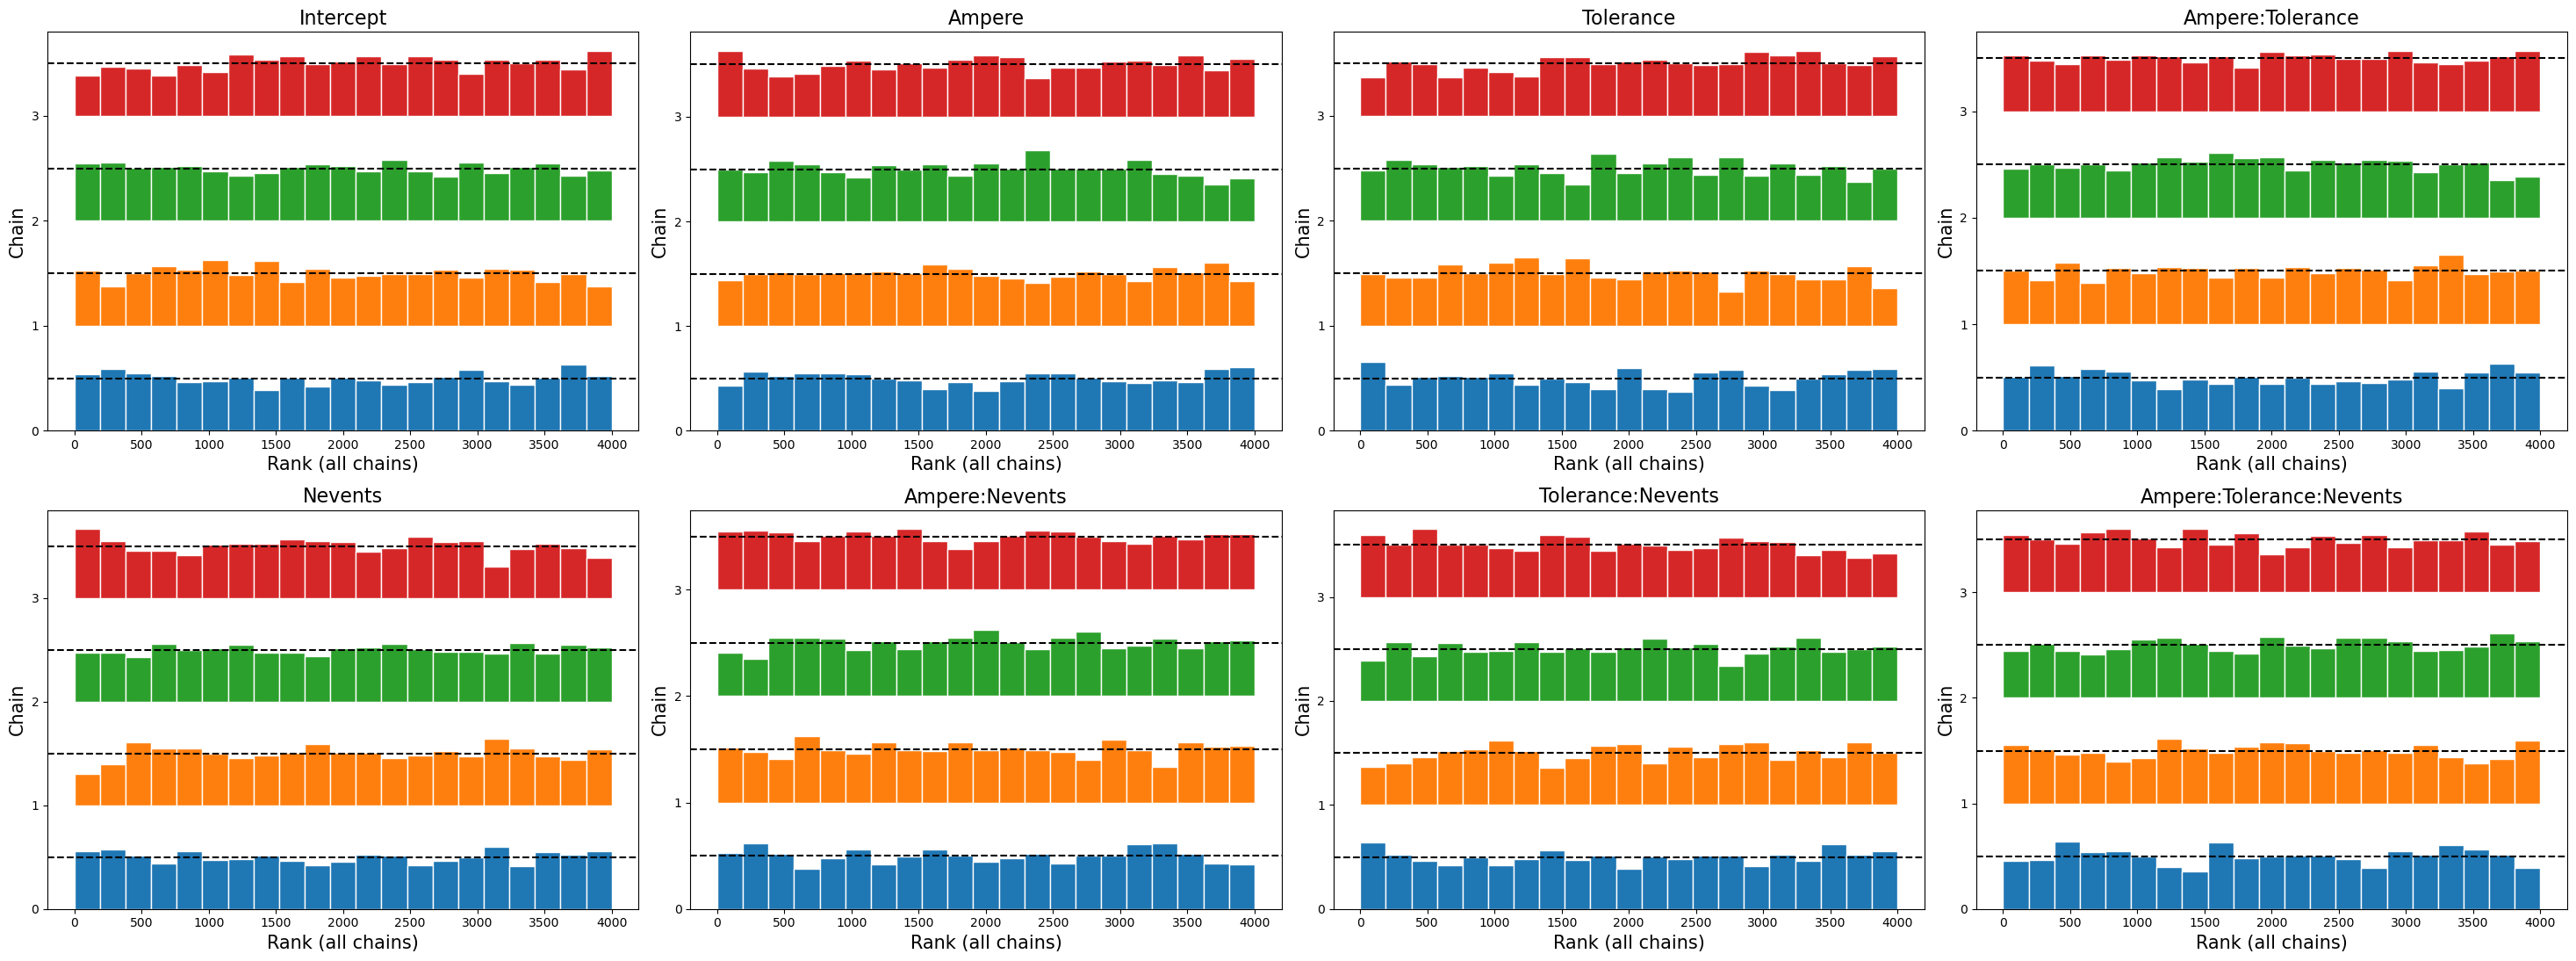

In [12]:
az.plot_rank(rec_fit, var_names=list(list(rec_fit.posterior.data_vars.keys()))[:-1])
plt.tight_layout()

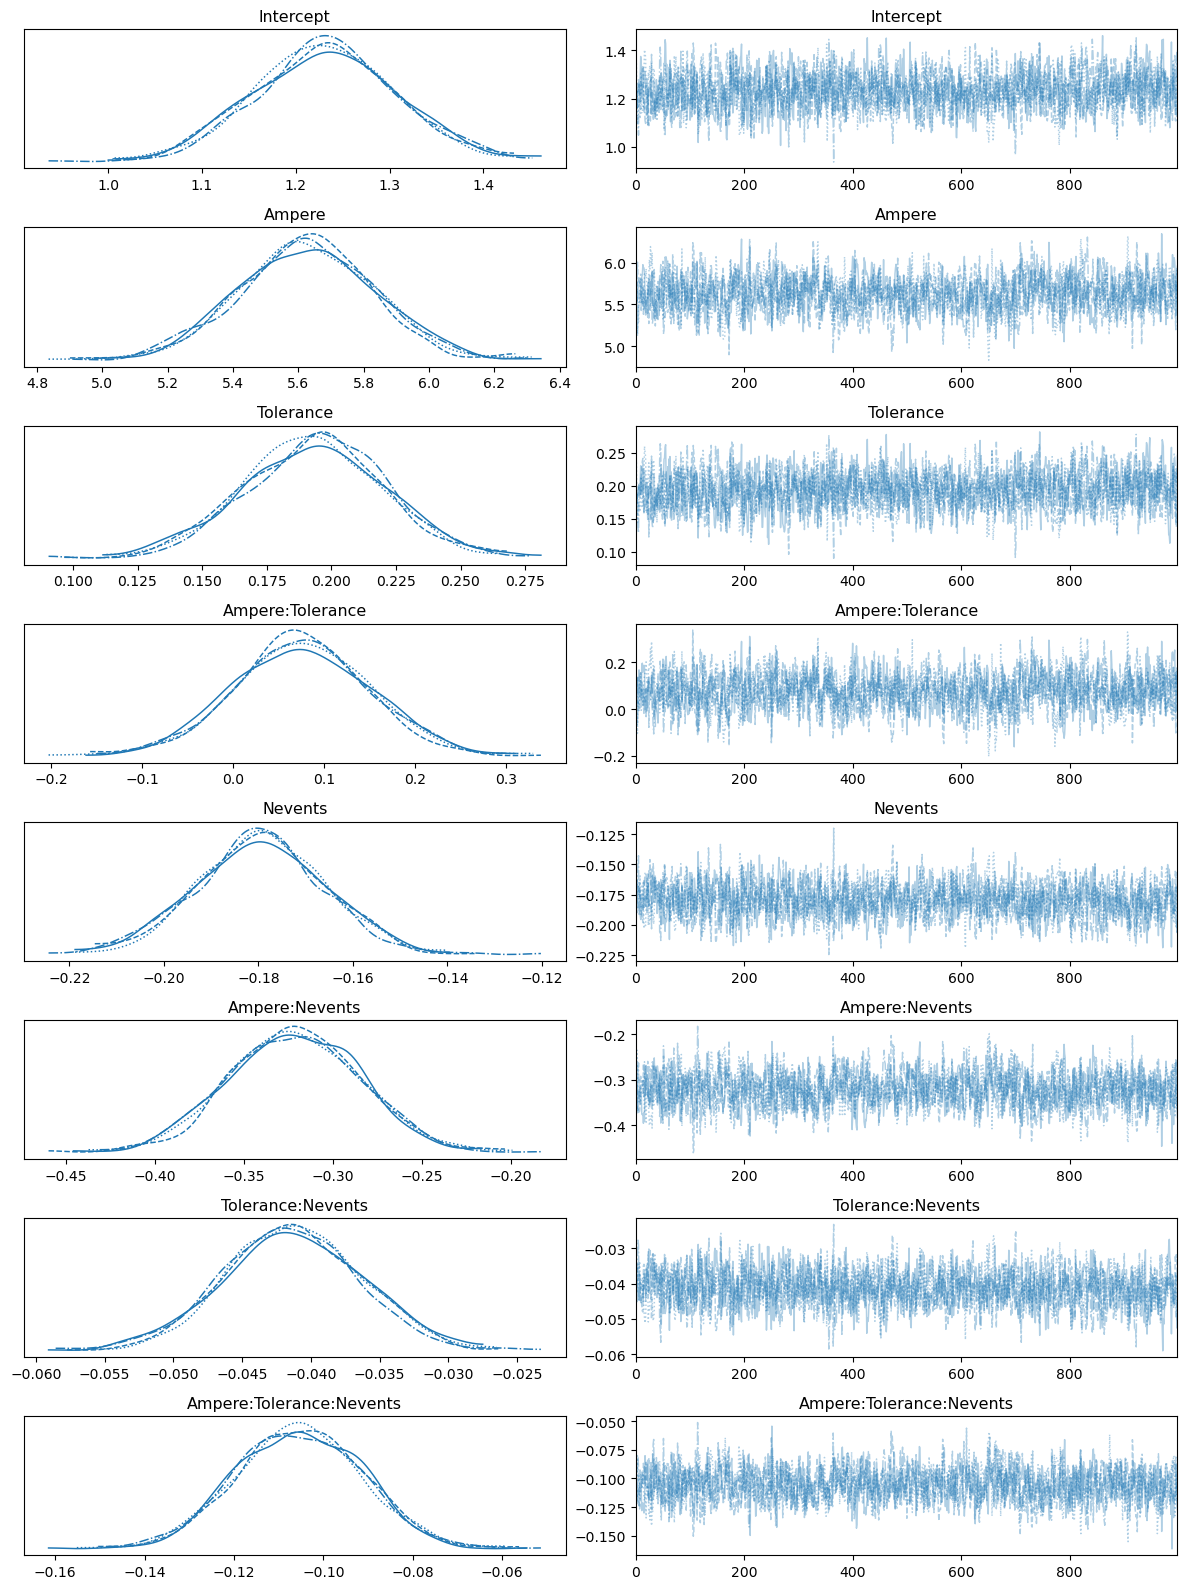

In [13]:
az.plot_trace(rec_fit, compact=True, var_names=list(list(rec_fit.posterior.data_vars.keys()))[:-1])
plt.tight_layout()

## Supplementary

In [14]:
az.summary(rec_fit, hdi_prob=.95, var_names=list(list(rec_fit.posterior.data_vars.keys()))[:-1]).iloc[:,:4].to_latex(float_format="{:0.3f}".format, bold_rows=True)

'\\begin{tabular}{lrrrr}\n\\toprule\n & mean & sd & hdi_2.5% & hdi_97.5% \\\\\n\\midrule\n\\textbf{Intercept} & 1.232 & 0.076 & 1.085 & 1.381 \\\\\n\\textbf{Ampere} & 5.626 & 0.207 & 5.220 & 6.020 \\\\\n\\textbf{Tolerance} & 0.193 & 0.027 & 0.140 & 0.246 \\\\\n\\textbf{Ampere:Tolerance} & 0.075 & 0.075 & -0.071 & 0.226 \\\\\n\\textbf{Nevents} & -0.179 & 0.013 & -0.206 & -0.153 \\\\\n\\textbf{Ampere:Nevents} & -0.322 & 0.037 & -0.392 & -0.250 \\\\\n\\textbf{Tolerance:Nevents} & -0.041 & 0.005 & -0.051 & -0.032 \\\\\n\\textbf{Ampere:Tolerance:Nevents} & -0.105 & 0.014 & -0.132 & -0.078 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [15]:
az.summary(ppv_fit, hdi_prob=.95, var_names=list(list(rec_fit.posterior.data_vars.keys()))[:-1]).iloc[:,:4].to_latex(float_format="{:0.3f}".format, bold_rows=True)

'\\begin{tabular}{lrrrr}\n\\toprule\n & mean & sd & hdi_2.5% & hdi_97.5% \\\\\n\\midrule\n\\textbf{Intercept} & 4.219 & 0.203 & 3.840 & 4.629 \\\\\n\\textbf{Ampere} & 7.423 & 0.551 & 6.335 & 8.469 \\\\\n\\textbf{Tolerance} & 0.489 & 0.063 & 0.367 & 0.609 \\\\\n\\textbf{Ampere:Tolerance} & 1.537 & 0.155 & 1.239 & 1.841 \\\\\n\\textbf{Nevents} & 1.554 & 0.099 & 1.368 & 1.754 \\\\\n\\textbf{Ampere:Nevents} & 3.734 & 0.250 & 3.235 & 4.205 \\\\\n\\textbf{Tolerance:Nevents} & 0.353 & 0.026 & 0.301 & 0.404 \\\\\n\\textbf{Ampere:Tolerance:Nevents} & 0.996 & 0.064 & 0.872 & 1.121 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [16]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Tue Feb 13 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.21.0

arviz     : 0.17.0
numpy     : 1.26.4
xarray    : 2024.1.1
matplotlib: 3.8.2
pandas    : 2.2.0
mne       : 1.6.1
hmp       : 0.3.0
bambi     : 0.13.0

Watermark: 2.4.3

